<h1>imports<h1>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import seaborn as sns

<h1>Setup<h1>

In [2]:
df= con = sqlite3.connect('../nokia.db')
df = pd.read_sql_query('SELECT * FROM Makkah_5g', con)
con.close()

In [3]:
data = df.dropna(subset=['Serving RS Info-Serving RSRQ (d B)'])
data = data.fillna(0)

features = [
    'Latitude', 'Longitude', 'Serving Channel Info-DL EARFCN',
    'Serving Cell Info-Serving PCI', 'Serving RS Info-NR Best SS-RSRP',
    'Serving RS Info-NR Best SS-SINR', 'Data Throughput-RLC DL Throughput (kbps)',
    'Serving RS Info-Serving RSRP (d Bm)', 'Serving RS Info-Serving RS CINR (d B)',
     'Data Throughput-NR PDCP downlink throughput (Mbps)',
    '5G NR-NR Best SS-RSRP', '5G NR-NR PDCP downlink throughput (Mbps)',
    '5G NR-NR Best SS-SINR'
]

X = data[features]
y = data['Serving RS Info-Serving RSRQ (d B)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

<h3>Predicting RSRP<h3>


<h4>Linear, Lasso, Ridge and elastic regressions<h4>

In [4]:
# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

# Evaluate Linear Regression model
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))
linear_r2 = r2_score(y_test, linear_pred)
print(f'Linear Regression RMSE: {linear_rmse}')
print(f'Linear Regression R2: {linear_r2}')

# Define parameter grid for Ridge Regression
ridge_param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_model = Ridge()
ridge_grid_search = GridSearchCV(ridge_model, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)

# Get best model
best_ridge_model = ridge_grid_search.best_estimator_
ridge_pred = best_ridge_model.predict(X_test)

# Evaluate Ridge Regression model
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)
print(f'Ridge Regression RMSE: {ridge_rmse}')
print(f'Ridge Regression R2: {ridge_r2}')
print(f'Best Ridge Parameters: {ridge_grid_search.best_params_}')

# Define parameter grid for Lasso Regression
lasso_param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_model = Lasso()
lasso_grid_search = GridSearchCV(lasso_model, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)

# Get best model
best_lasso_model = lasso_grid_search.best_estimator_
lasso_pred = best_lasso_model.predict(X_test)

# Evaluate Lasso Regression model
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_r2 = r2_score(y_test, lasso_pred)
print(f'Lasso Regression RMSE: {lasso_rmse}')
print(f'Lasso Regression R2: {lasso_r2}')
print(f'Best Lasso Parameters: {lasso_grid_search.best_params_}')

Linear Regression RMSE: 2.1677700603780665
Linear Regression R2: 0.4990775991646724
Ridge Regression RMSE: 2.1677711828673756
Ridge Regression R2: 0.4990770804009942
Best Ridge Parameters: {'alpha': 1.0}
Lasso Regression RMSE: 2.1732431287155642
Lasso Regression R2: 0.4965450026672783
Best Lasso Parameters: {'alpha': 0.01}


<h4>Random Forest<h4>

In [5]:
rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train,y_train)

rf_pred = rf_model.predict(X_test)


rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)
print(f'Random Forest Regression RMSE: {rf_rmse}')
print(f'Random Forest Regression R2: {rf_r2}')
print(f'Best Random Forest Parameters: {rf_model.get_params()}')

Random Forest Regression RMSE: 1.2403213419535941
Random Forest Regression R2: 0.8360118528698859
Best Random Forest Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


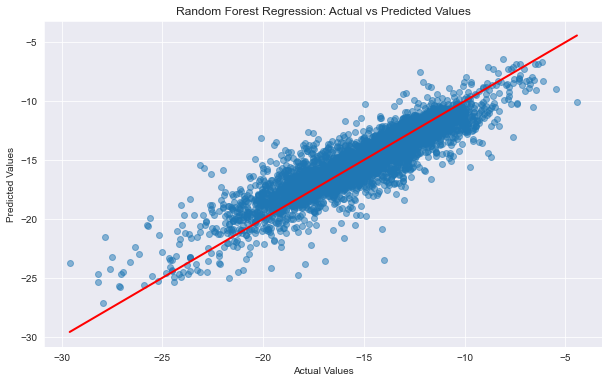

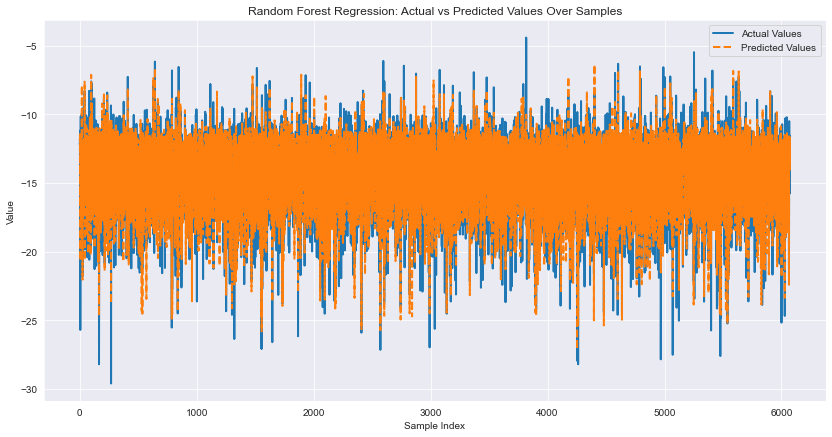

In [6]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line y=x
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: Actual vs Predicted Values')
plt.show()

# Line plot
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test, label='Actual Values', linewidth=2)
plt.plot(range(len(y_test)), rf_pred, label='Predicted Values', linewidth=2, linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Random Forest Regression: Actual vs Predicted Values Over Samples')
plt.legend()
plt.show()


<h4>Nueral Network<h4>

In [7]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlp_model = MLPRegressor(max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled,y_train)

mlp_pred = mlp_model.predict(X_test_scaled)

# Evaluate MLP Regressor model
mlp_rmse = np.sqrt(mean_squared_error(y_test, mlp_pred))
mlp_r2 = r2_score(y_test, mlp_pred)
print(f'MLP Regressor RMSE: {mlp_rmse}')
print(f'MLP Regressor R2: {mlp_r2}')
print(f'MLP Regressor Parameters: {mlp_model.get_params()}')

MLP Regressor RMSE: 1.544332539687494
MLP Regressor R2: 0.74577065981035
MLP Regressor Parameters: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


<h1>visualization<h1>

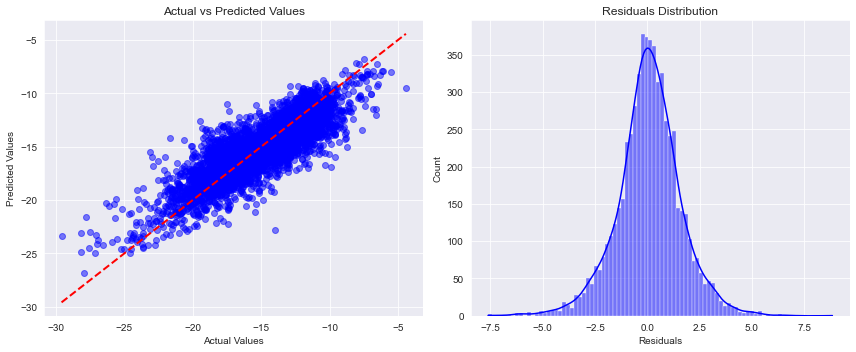

In [9]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 5))

# Scatter plot of predictions vs actual values
plt.subplot(1, 2, 1)
plt.scatter(y_test, mlp_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Plot residuals
plt.subplot(1, 2, 2)
residuals = y_test - mlp_pred
sns.histplot(residuals, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Residuals Distribution')

plt.tight_layout()
plt.show()


<h1> Random forest fits best among the rest<h1>